In [4]:
!unzip spotify.zip

Archive:  spotify.zip
  inflating: top50.csv               


In [5]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#encoding & reading data
data = pd.read_csv('top50.csv',encoding='ISO-8859-1')
data.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [7]:
df =data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [9]:
df.rename(columns={'Track.Name':'Track_name','Artist.Name':'Artist_name','Beats.Per.Minute':'Beats_per_minute','Loudness..dB..':'Loudness(db)',
                     'Valence.':'Valence','Length.':'Length','Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,Unnamed: 0,Track_name,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness(db),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [10]:
df.columns

Index(['Unnamed: 0', 'Track_name', 'Artist_name', 'Genre', 'Beats_per_minute',
       'Energy', 'Danceability', 'Loudness(db)', 'Liveness', 'Valence',
       'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [11]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [12]:
df.isnull().sum()

Track_name          0
Artist_name         0
Genre               0
Beats_per_minute    0
Energy              0
Danceability        0
Loudness(db)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.groupby(df['Genre']).size()

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64

In [15]:
df.groupby(df['Artist_name']).size()

Artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

In [16]:
df['Artist_name'][df['Popularity']==df['Popularity'].max()]

9    Billie Eilish
Name: Artist_name, dtype: object

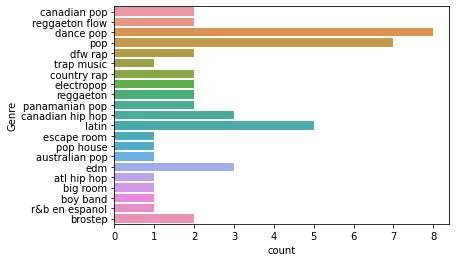

In [17]:
sns.countplot(data=data,y='Genre')
plt.show()

<AxesSubplot:>

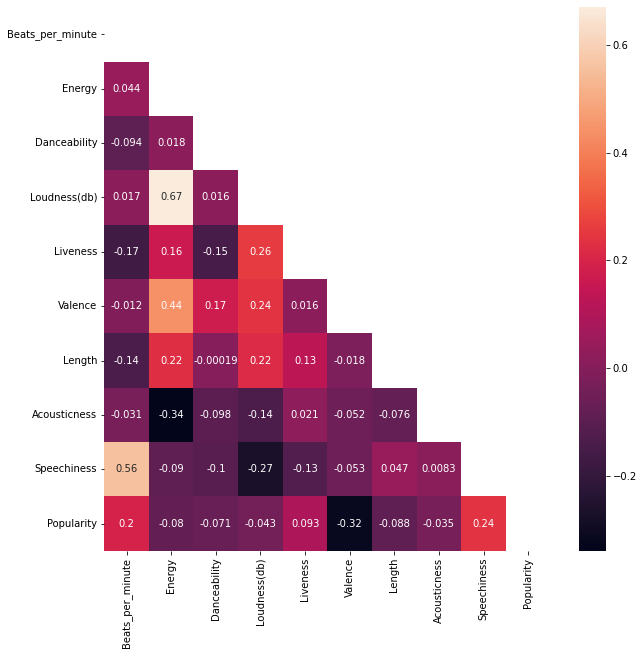

In [18]:
corr = df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

plt.figure(figsize=(10,10))
# using the upper triangle matrix as mask
sns.heatmap(corr, annot=True, mask=matrix)

<AxesSubplot:title={'center':'popularity vs Beats per minute'}, xlabel='Popularity', ylabel='Beats_per_minute'>

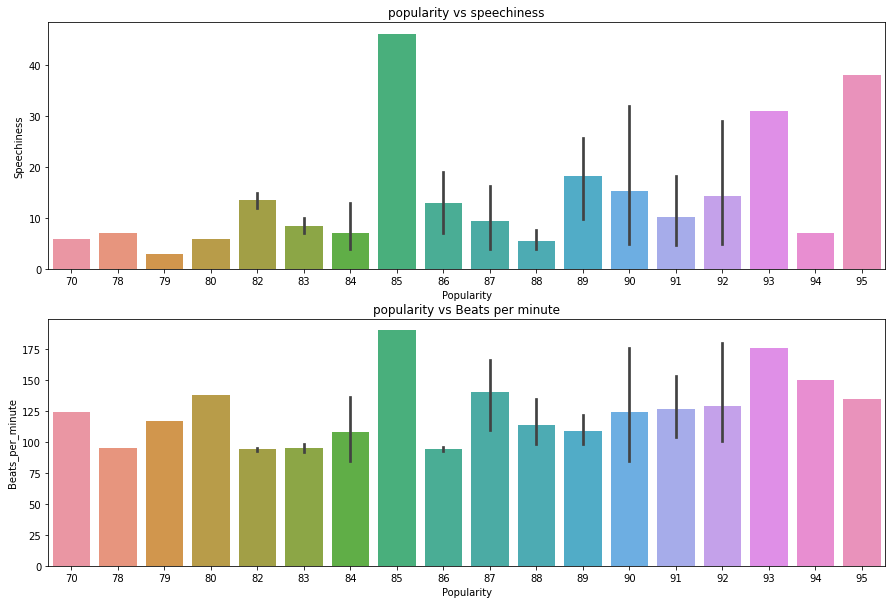

In [19]:
boyut=plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.xlabel('popularity')
plt.ylabel('speechiness')
plt.title('popularity vs speechiness')
sns.barplot(data=df,y='Speechiness',x='Popularity')

plt.subplot(2,1,2)
plt.xlabel('popularity')
plt.ylabel('Beats per minute')
plt.title('popularity vs Beats per minute')
sns.barplot(data=df,y='Beats_per_minute',x='Popularity')


In [51]:
fig = px.scatter(df, x="Popularity", y="Energy")
fig.update_layout(legend_orientation='h',autosize=False, width=950,height=400, title='Energy effect on popularity')
fig.show()

In [52]:
fig = px.scatter(df, x="Popularity", y="Loudness(db)")
fig.update_layout(legend_orientation='h',autosize=False, width=950,height=400, title='Loudness effect on popularity')
fig.show()

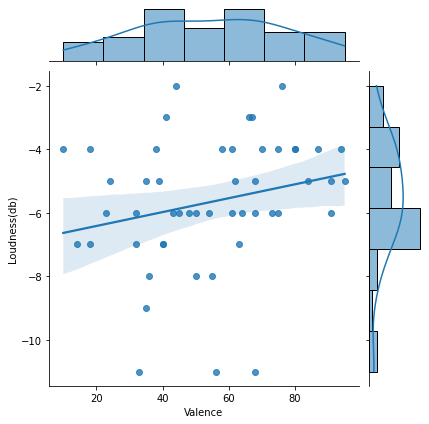

In [20]:
# Plotting Regression
sns.jointplot(x='Valence',y='Loudness(db)',data=df,kind='reg')
plt.show()

In [21]:
#top 10 artists
df['Count']=1
df_artist=df.groupby('Artist_name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

,Artist_name,Count
9,Ed Sheeran,4
19,Lil Nas X,2
32,Shawn Mendes,2
25,Marshmello,2
28,Post Malone,2
31,Sech,2
10,J Balvin,2
34,The Chainsmokers,2
4,Billie Eilish,2
2,Ariana Grande,2


In [45]:
fig = px.bar(df_artist.head(10),x='Artist_name', y='Count',text_auto=True)
fig.update_layout(legend_orientation="h", title="Top 10 Artist")
fig.show()

In [44]:
fig=px.pie(df_artist.head(10),values='Count',names='Artist_name',hole=0.4)
fig.update_layout(title='Top 10 Artists',font_size=15,title_x=0.45,annotations=[dict(text='Artist',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [24]:
df_top_tracks=df.sort_values(by='Popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1
df_top_tracks

,Track_name,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness(db),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Count
1,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,1
2,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,1
3,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93,1
4,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92,1
5,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,1
7,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91,1
8,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91,1
9,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91,1
10,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91,1


In [43]:
fig=px.pie(df_top_tracks.head(10),values='Popularity',names='Genre',hole=0.3)
fig.update_layout(title='Top 10 popular genres ',font_size=15,title_x=0.45,annotations=[dict(text='Genres',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()